In [ ]:
import pandas as pd
table = pd.read_csv(r"/content/bill_authentication.csv", sep=',')
df = pd.DataFrame(table)
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[['Variance', 'Skewness', 'Curtosis', 'Entropy']])
df[['Variance', 'Skewness', 'Curtosis', 'Entropy']] = x
df

,Variance,Skewness,Curtosis,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [ ]:
from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df, test_size=0.4, random_state=2406)
test_table = test_table.reset_index()
print(train_table, test_table)

      Variance  Skewness  Curtosis   Entropy  Class
685   1.280125  0.974525 -0.807720  0.010407      0
639   1.214355 -0.844730  0.263615  0.663634      0
441   0.152874  1.418217 -0.670501 -1.341053      0
263   1.602640  0.900448 -1.086752  0.014692      0
796   0.424765  0.396793 -1.462223 -0.700129      1
...        ...       ...       ...       ...    ...
991  -1.204210 -0.274404 -0.219851  0.600219      1
559   0.556973 -0.370692  0.875736  1.079852      0
788  -0.319660 -1.069039  0.137514  0.925299      1
1316 -0.716689 -0.393970  0.051613  1.476948      1
702   1.167764 -0.957941  0.602692  1.188792      0

[823 rows x 5 columns]      index  Variance  Skewness  Curtosis   Entropy  Class
0     1076 -0.347424 -1.678167  1.234310  0.921604      1
1      261  0.957856  0.165069 -0.185843  0.947463      0
2      240  0.998219  0.853899 -0.567077  0.679028      0
3      557  1.269216 -0.239839 -0.085814  1.093993      0
4      571  0.639740 -1.204136  0.671696 -0.027160      0
..  

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import math
criterion = ['entropy', 'gini']
alpha = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.8]
score = [0]*len(alpha)*len(criterion)
depth = [0]*len(alpha)*len(criterion)
for i in range(len(criterion)):
  for j in range(len(alpha)):
    clf = tree.DecisionTreeClassifier(criterion=criterion[i], random_state=2406, ccp_alpha=alpha[j])
    clf.fit(train_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], train_table['Class'])
    score[i*len(alpha)+j] = 1-clf.score(test_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], test_table['Class'])
    depth[i*len(alpha)+j] = clf.tree_.max_depth
r = min(score)
SE = math.sqrt(r*(1-r)/test_table.shape[0])
index_max = 0
for i in range(len(depth)):
  if score[i]<r+SE and depth[i]<depth[index_max]:
    index_max = i
print(index_max, depth[index_max], score[index_max])

0 6 0.00910746812386154


<function matplotlib.pyplot.show(close=None, block=None)>

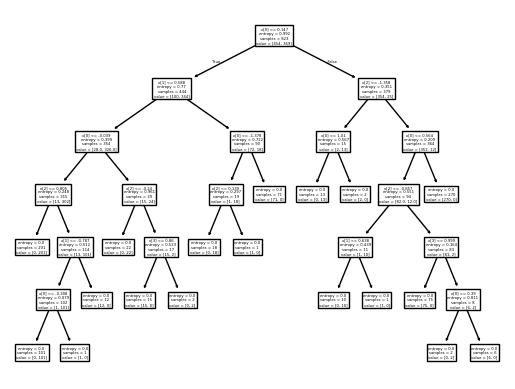

In [ ]:
clf = tree.DecisionTreeClassifier(criterion=criterion[index_max//len(alpha)], random_state=2406, ccp_alpha=alpha[index_max])
clf.fit(train_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], train_table['Class'])
tree.plot_tree(clf)
plt.show

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'